In [203]:
#### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import time
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [204]:
#### Getting the data
def read_data():
    data = pd.read_csv("C:/Kaggle_dataset/FastagFraudDetection/FastagFraudDetection.csv")
    return data

In [205]:
#### Calling of data
df = read_data()
print(df)

      Transaction_ID        Timestamp Vehicle_Type         FastagID  \
0                  1   1/6/2023 11:20         Bus   FTG-001-ABC-121   
1                  2   1/7/2023 14:55          Car  FTG-002-XYZ-451   
2                  3   1/8/2023 18:25   Motorcycle              NaN   
3                  4    1/9/2023 2:05        Truck  FTG-044-LMN-322   
4                  5   1/10/2023 6:35          Van  FTG-505-DEF-652   
...              ...              ...          ...              ...   
4995            4996   1/1/2023 22:18        Truck  FTG-445-EDC-765   
4996            4997  1/17/2023 13:43          Van  FTG-446-LMK-432   
4997            4998    2/5/2023 5:08        Sedan  FTG-447-PLN-109   
4998            4999  2/20/2023 20:34          SUV  FTG-458-VFR-876   
4999            5000   3/10/2023 0:59         Bus   FTG-459-WSX-543   

     TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  \
0          A-101   Express              Large                 350   
1        

In [206]:
### Preprocessing And Feature Engineering
df1 = df.copy()
print(df1.head())
print(df1.info())
print(df1.shape)

   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

In [207]:
df1.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [208]:
df1['day'] = df1['Timestamp'].str.split('/').str[1]
df1['month'] = df1['Timestamp'].str.split('/').str[0]
df1['year'] = df1['Timestamp'].str.split('/').str[2]
df1['Year'] = df1['year'].str.split(' ').str[0]

In [209]:
df1['FastagID'] = df1['FastagID'].fillna('Non-Id')

In [210]:
df1

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,day,month,year,Year
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,6,1,2023 11:20,2023
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,7,1,2023 14:55,2023
2,3,1/8/2023 18:25,Motorcycle,Non-Id,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,8,1,2023 18:25,2023
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,9,1,2023 2:05,2023
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,10,1,2023 6:35,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,1,1,2023 22:18,2023
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,17,1,2023 13:43,2023
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,5,2,2023 5:08,2023
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,20,2,2023 20:34,2023


In [211]:
df1['Year'].value_counts()

2023    5000
Name: Year, dtype: int64

In [212]:
df1.isna().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
day                      0
month                    0
year                     0
Year                     0
dtype: int64

In [213]:
df1.duplicated().sum()

0

In [214]:
cat_col = []
num_col = []
for i in df1.columns:
    if df1[i].dtypes == object:
        cat_col.append(i)
    else:
        num_col.append(i)

In [215]:
cat_col

['Timestamp',
 'Vehicle_Type',
 'FastagID',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Vehicle_Plate_Number',
 'Fraud_indicator',
 'day',
 'month',
 'year',
 'Year']

In [216]:
num_col

['Transaction_ID', 'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

In [217]:
for i in cat_col:
    print(df1[i].value_counts())
    print('*'*35)

1/1/2023 8:15      5
1/24/2023 2:55     5
1/6/2023 11:20     4
3/3/2023 18:05     4
3/11/2023 8:55     4
                  ..
11/3/2023 22:30    1
12/9/2023 0:45     1
1/25/2023 3:00     1
3/1/2023 5:15      1
3/10/2023 0:59     1
Name: Timestamp, Length: 4423, dtype: int64
***********************************
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: Vehicle_Type, dtype: int64
***********************************
Non-Id             549
FTG-001-ABC-121      1
FTG-524-CDE-098      1
FTG-531-ZAS-987      1
FTG-530-LPO-210      1
                  ... 
FTG-414-HIJ-567      1
FTG-647-KLM-890      1
FTG-880-NOP-123      1
FTG-113-QRS-456      1
FTG-459-WSX-543      1
Name: FastagID, Length: 4452, dtype: int64
***********************************
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: TollBoothID, dtype: int64
***********************************
Regular   

In [218]:
df1.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4452
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
day                        31
month                      12
year                     1122
Year                        1
dtype: int64

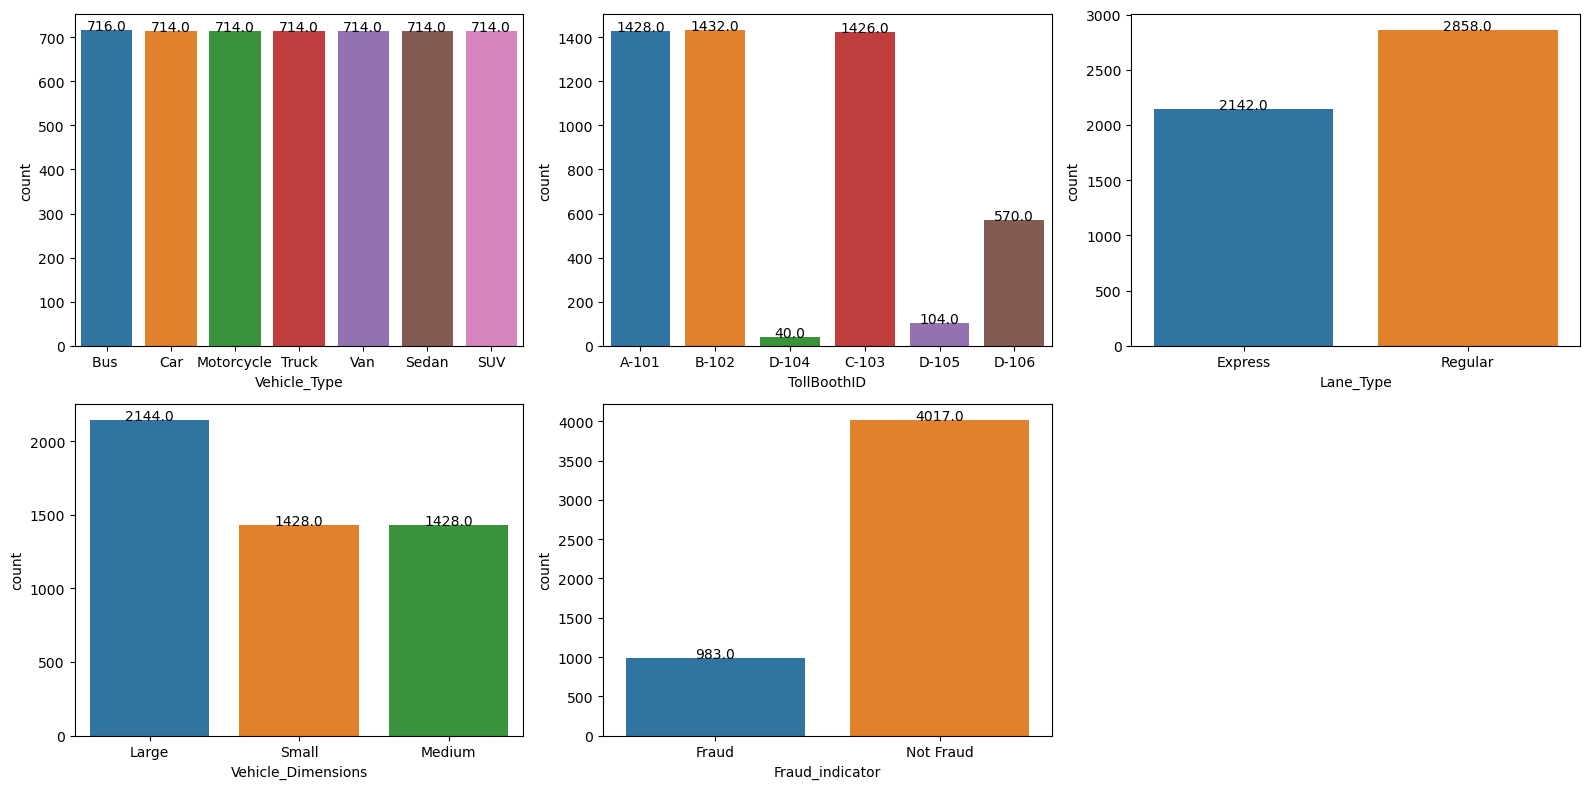

In [219]:
col= [
 'Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Fraud_indicator']
plt.figure(figsize=(16,8))
for i,cols in enumerate(col,1):
    plt.subplot(2,3,i)
    graph = sns.countplot(data=df1,x = cols)
    for p in graph.patches:
        graph.annotate(f'{p.get_height()}' ,(p.get_x() + p.get_width() / 2.,p.get_height()),ha='center',va='baseline')
plt.tight_layout()
plt.show()

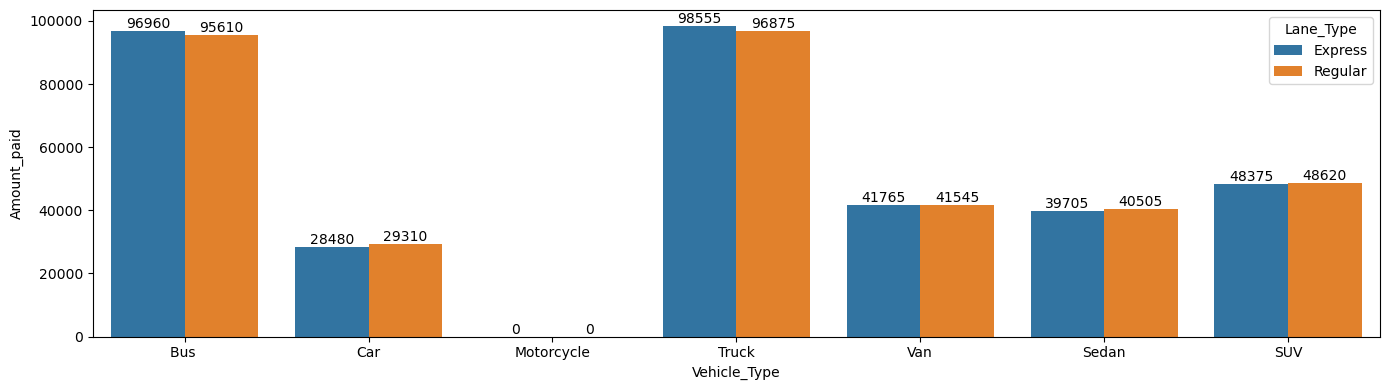

In [220]:
plt.figure(figsize=(14,4))
ax = sns.barplot(data=df1,x='Vehicle_Type',y='Amount_paid',hue='Lane_Type',errorbar=None,estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

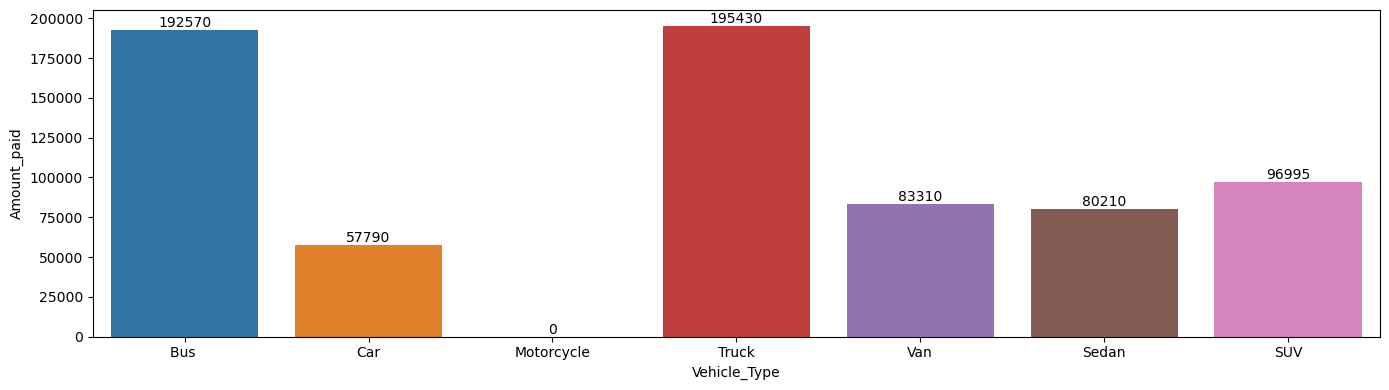

In [221]:
plt.figure(figsize=(14,4))
ax = sns.barplot(data=df1,x='Vehicle_Type',y='Amount_paid',errorbar=None,estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

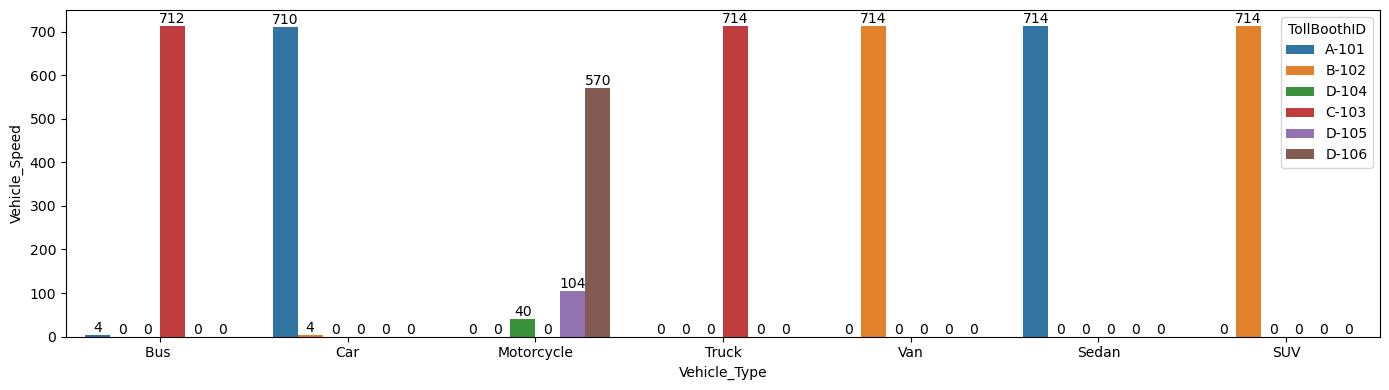

In [222]:
plt.figure(figsize=(14,4))
ax = sns.barplot(data=df1,x='Vehicle_Type',y='Vehicle_Speed',hue='TollBoothID',errorbar=None,estimator='count')
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

In [223]:
df1['Vehicle_Speed'].sort_values()

785      10
3285     10
3246     20
746      20
3247     21
       ... 
2403    105
4205    111
1705    111
1707    118
4207    118
Name: Vehicle_Speed, Length: 5000, dtype: int64

<Axes: xlabel='Vehicle_Type,Vehicle_Speed'>

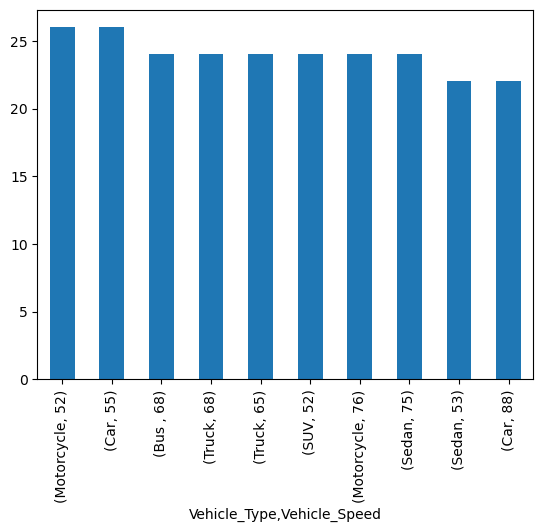

In [224]:
df1.groupby('Vehicle_Type')['Vehicle_Speed'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

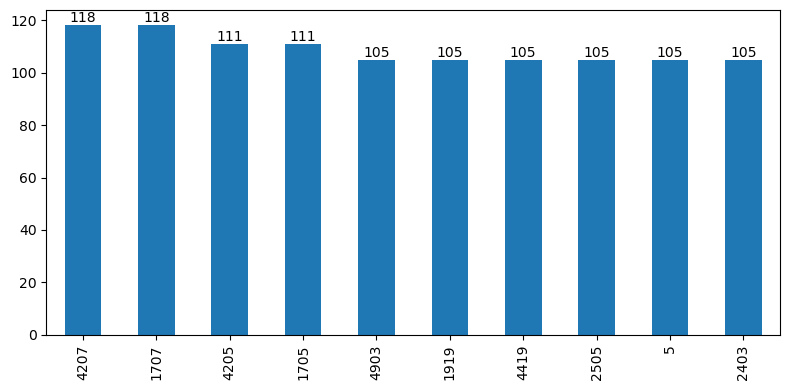

In [225]:
plt.figure(figsize=(8,4))
ax = df1['Vehicle_Speed'].sort_values(ascending=False).head(10).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

AttributeError: 'BarContainer' object has no attribute 'annotate'

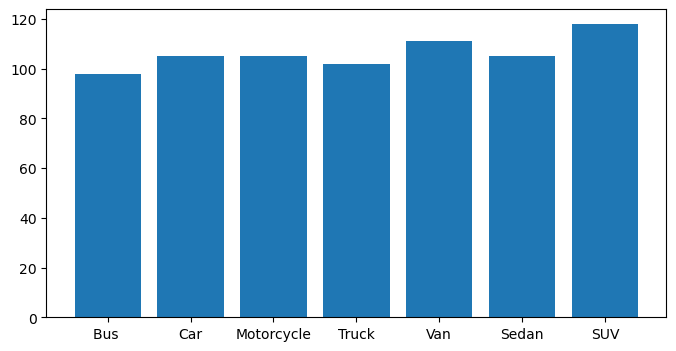

In [226]:
plt.figure(figsize=(8,4))
graph = plt.bar('Vehicle_Type','Vehicle_Speed',data=df1)
for p in graph.patches:
    graph.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2.0,p.get_height()),
                   ha='center',va='baseline')
plt.xlabel('Vehicle Type')
plt.ylabel('Speed')
plt.title('Which Vehicle Runs at High Speed')
plt.tight_layout()
plt.show()


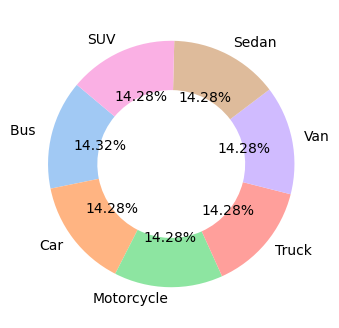

In [227]:
plt.figure(figsize=(10,4))
type_value_counts = df1['Vehicle_Type'].value_counts()
colors = sns.color_palette('pastel',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct= '%1.2f%%',startangle=140,colors=colors,wedgeprops=dict(width=0.4))
plt.show()

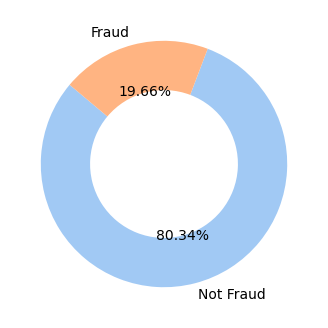

In [228]:
plt.figure(figsize=(10,4))
type_value_counts = df1['Fraud_indicator'].value_counts()
colors = sns.color_palette('pastel',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct= '%1.2f%%',startangle=140,colors=colors,wedgeprops=dict(width=0.4))
plt.show()

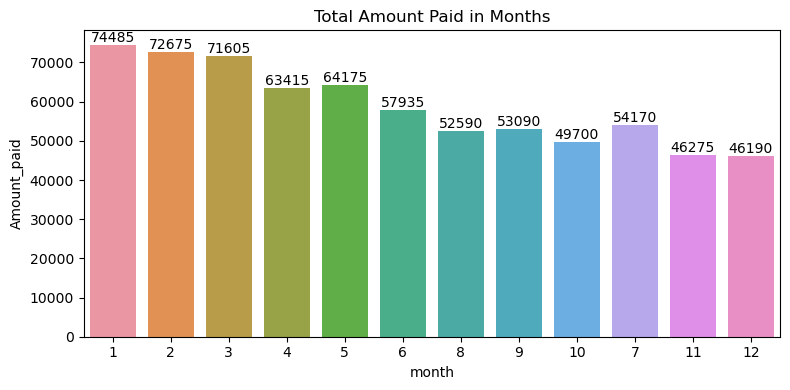

In [229]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='month',y='Amount_paid',estimator=sum,errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Amount Paid in Months')
plt.tight_layout()
plt.show()

In [230]:
df1

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,day,month,year,Year
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,6,1,2023 11:20,2023
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,7,1,2023 14:55,2023
2,3,1/8/2023 18:25,Motorcycle,Non-Id,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,8,1,2023 18:25,2023
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,9,1,2023 2:05,2023
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,10,1,2023 6:35,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,1,1,2023 22:18,2023
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,17,1,2023 13:43,2023
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,5,2,2023 5:08,2023
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,20,2,2023 20:34,2023


In [231]:
df1.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator', 'day', 'month', 'year',
       'Year'],
      dtype='object')

In [232]:
df1['Fraud_indicator'] = df1['Fraud_indicator'].replace(('Fraud','Not Fraud'),(0,1))

In [233]:
X = df1[['Transaction_Amount','Amount_paid']]
y = df1['Fraud_indicator']

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,r2_score

In [235]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [236]:
model = LogisticRegression()
model_fit = model.fit(X_train,y_train)
pred = model_fit.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [237]:
r2_score(y_test,pred)

0.9024730059212818

In [238]:
accuracy_score(y_test,pred)

0.98425

In [240]:
precision_score(y_test,pred)

0.9806332616046726

In [241]:
from sklearn.metrics import classification_report,confusion_matrix

In [242]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       810
           1       0.98      1.00      0.99      3190

    accuracy                           0.98      4000
   macro avg       0.99      0.96      0.97      4000
weighted avg       0.98      0.98      0.98      4000



In [244]:
cm = confusion_matrix(y_test,pred)
cm

array([[ 747,   63],
       [   0, 3190]], dtype=int64)

<Axes: >

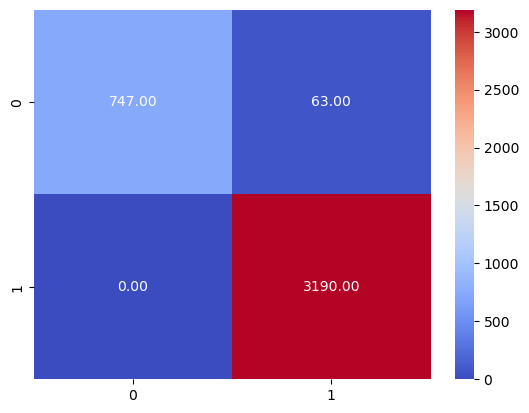

In [246]:
sns.heatmap(data=cm,annot=True,cmap='coolwarm',fmt=".2f")